####  this notebook is for step 2 of tasks: Get the data in a form something like (longitude, latitude, time, fire/land/water/burned area/no data, FRP, confidence, source).  ml_tign should be doing something like that. We may add more such as pixel size or pixel ellipse later. Determine from literature the possible values delivered by the satellite products we use and check them out in real data. Make some pictures, keep good notes (git is best), store pictures


# MODIS data

# MODIS Fire Data Features

This notebook provides an overview of the key features found in MODIS fire detection datasets, with detailed explanations of each feature and its significance.
https://modis-fire.umd.edu/files/MODIS_C6_Fire_User_Guide_C.pdf#page=8.23

## 1. Longitude and Latitude
- **Description**: These represent the geographical position of each detected fire pixel.
- **Format**: Degrees (°)
- **Range**:
  - Longitude: -180° to +180°
  - Latitude: -90° to +90°
  
## 2. Time
- **Description**: The time when each fire pixel was detected by the satellite.
- **Format**: UTC (Coordinated Universal Time)
- **Use**: Helps to timestamp fire occurrences for further temporal analysis.

## 3. Fire Mask (Fire/Land/Water/Burned Area/No Data)
- **Description**: The fire mask assigns pixels into different categories based on their type (fire, land, water, etc.).
- **Categories**:
  - `0`: Not processed (missing data)
  - `1`: Not processed (obsolete, not used since Collection 1)
  - `2`: Not processed (other reasons)
  - `3`: Water (non-fire pixel)
  - `4`: Cloud-covered (land or water)
  - `5`: Non-fire land pixel
  - `6`: Unknown (land or water)
  - `7`: Fire (low confidence, land or water)
  - `8`: Fire (nominal confidence, land or water)
  - `9`: Fire (high confidence, land or water)
  
## 4. Fire Radiative Power (FRP)
- **Description**: The amount of energy released by the fire, measured in megawatts (MW). FRP is useful for estimating fire intensity.
- **Range**: Typically ranges from 0 MW to several thousand MW for large fires.
- **Use**: FRP is an important metric for understanding fire behavior and estimating emissions.

## 5. Confidence
- **Description**: The confidence level indicates the reliability of the fire detection for each pixel.
- **Categories**:
  - Low confidence (7)
  - Nominal confidence (8)
  - High confidence (9)
- **Use**: Confidence helps users filter detections based on their tolerance for false positives or negatives. Higher confidence values indicate more reliable fire detections.

## 6. Source
- **Description**: The source of the MODIS data, which refers to the satellite that provided the observation.
- **Options**:
  - **Terra (MOD14)**
  - **Aqua (MYD14)**
- **Use**: The source satellite helps track which observations came from Terra or Aqua.


![How are the confidence values in the “FP confidence” SDS related to the confidence
classes assigned to fire pixels?](fire_confidence.jpg)

---

This document provides a brief explanation of each feature. As we proceed with the analysis, we'll use this information to process and visualize the fire detection data.


In [5]:
!pip install pyhdf

  Obtaining dependency information for pyhdf from https://files.pythonhosted.org/packages/33/6a/bbfb5b6a143b130e56e46ec95bcba94dce3c628e389051ff704d29bac6a6/pyhdf-0.11.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.5/771.5 kB 38.7 MB/s eta 0:00:00
DEPRECATION: neuralplot 0.0.8 has a non-standard dependency specifier matplotlib>=3.1numpy>=1.16. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of neuralplot or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from pyhdf.SD import SD, SDC
import matplotlib.pyplot as plt
import numpy as np
# Open the HDF5 file
file = SD('MOD14.A2018312.1950.061.2021344091856.hdf', SDC.READ)

# List all datasets in the file
datasets = file.datasets()
datasets


{'fire mask': (('number_of_scan_lines', 'pixels_per_scan_line'),
  (2030, 1354),
  21,
  0),
 'algorithm QA': (('number_of_scan_lines', 'pixels_per_scan_line'),
  (2030, 1354),
  25,
  1),
 'FP_line': (('number_of_active_fires',), (53,), 22, 2),
 'FP_sample': (('number_of_active_fires',), (53,), 22, 3),
 'FP_latitude': (('number_of_active_fires',), (53,), 5, 4),
 'FP_longitude': (('number_of_active_fires',), (53,), 5, 5),
 'FP_R2': (('number_of_active_fires',), (53,), 5, 6),
 'FP_T21': (('number_of_active_fires',), (53,), 5, 7),
 'FP_T31': (('number_of_active_fires',), (53,), 5, 8),
 'FP_MeanT21': (('number_of_active_fires',), (53,), 5, 9),
 'FP_MeanT31': (('number_of_active_fires',), (53,), 5, 10),
 'FP_MeanDT': (('number_of_active_fires',), (53,), 5, 11),
 'FP_MAD_T21': (('number_of_active_fires',), (53,), 5, 12),
 'FP_MAD_T31': (('number_of_active_fires',), (53,), 5, 13),
 'FP_MAD_DT': (('number_of_active_fires',), (53,), 5, 14),
 'FP_power': (('number_of_active_fires',), (53,), 5, 

 Access Metadata

In [5]:
# File path to the MODIS HDF file
mod14_file = 'MOD14.A2018312.1950.061.2021344091856.hdf'

# Open the HDF file for reading
hdf_file = SD(mod14_file, SDC.READ)

# Retrieve global attributes (metadata) from the HDF file
global_attrs = hdf_file.attributes()

# Print metadata information
print("Global Metadata in the HDF file:")
for key, value in global_attrs.items():
    print(f"{key}: {value}")

# Close the HDF file
hdf_file.end()

Global Metadata in the HDF file:
FirePix: 53
LandFirePix: 53
WaterFirePix: 0
MissingPix: 0
LandPix: 201994
WaterPix: 2538848
CoastPix: 7778
WaterAdjacentFirePix: 13
CloudAdjacentFirePix: 3
UnknownLandPix: 0
UnknownWaterPix: 9482
LandCloudPix: 8394
WaterCloudPix: 1026055
GlintPix: 0
GlintRejectedPix: 0
CoastRejectedLandPix: 4
HotSurfRejectedPix: 0
ClearingRejectedPix: 0
CoastRejectedWaterPix: 0
DayPix: 2748620
NightPix: 0
MissingRadPix: 0
MissingGeoPix: 0
Satellite: Terra
ProcessVersionNumber: 6.2.3
MOD021KM input file: /MODAPSops7/archive/f7477/running/AM1M_C61_L1mc/14229088/MOD021KM.A2018312.1950.061.2018313074449.hdf
MOD03 input file: /MODAPSops7/archive/f7477/running/AM1M_C61_L1mc/14229088/MOD03.A2018312.1950.061.2018313011438.hdf
SystemID: Linux minion7477 3.10.0-1160.42.2.el7.x86_64 #1 SMP Tue Sep 7 14:49:57 UTC 2021 x86_64
identifier_product_doi: 10.5067/MODIS/MOD14.061
identifier_product_doi_authority: http://dx.doi.org
CoreMetadata.0: 
GROUP                  = INVENTORYMETADATA

In [48]:
from pyhdf.SD import SD, SDC
import numpy as np

# File path to the MODIS HDF file
mod14_file = 'MOD14.A2018312.1950.061.2021344091856.hdf'

# Open the HDF file for reading
hdf_file = SD(mod14_file, SDC.READ)

# Find the index of the "fire mask" SDS
fire_mask_sds = hdf_file.select('fire mask')

# Read the entire "fire mask" dataset
fire_mask_data = fire_mask_sds.get()

# Print the shape of the fire mask data and an example of its content
print(f"Fire Mask Data Shape: {fire_mask_data.shape}")
print(f"Fire Mask Data (Sample): \n{fire_mask_data[:10, :10]}")

# Closing the HDF file
hdf_file.end()


Fire Mask Data Shape: (2030, 1354)
Fire Mask Data (Sample): 
[[4 4 4 3 4 3 3 3 3 3]
 [4 4 4 4 4 3 3 3 3 3]
 [3 4 4 4 4 4 4 3 4 3]
 [3 3 3 3 3 3 3 3 4 3]
 [4 4 3 3 3 3 3 3 3 3]
 [4 4 3 3 3 4 3 3 3 3]
 [4 3 3 3 3 3 3 3 3 3]
 [4 3 3 3 4 3 3 3 3 3]
 [4 3 3 3 3 4 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]]


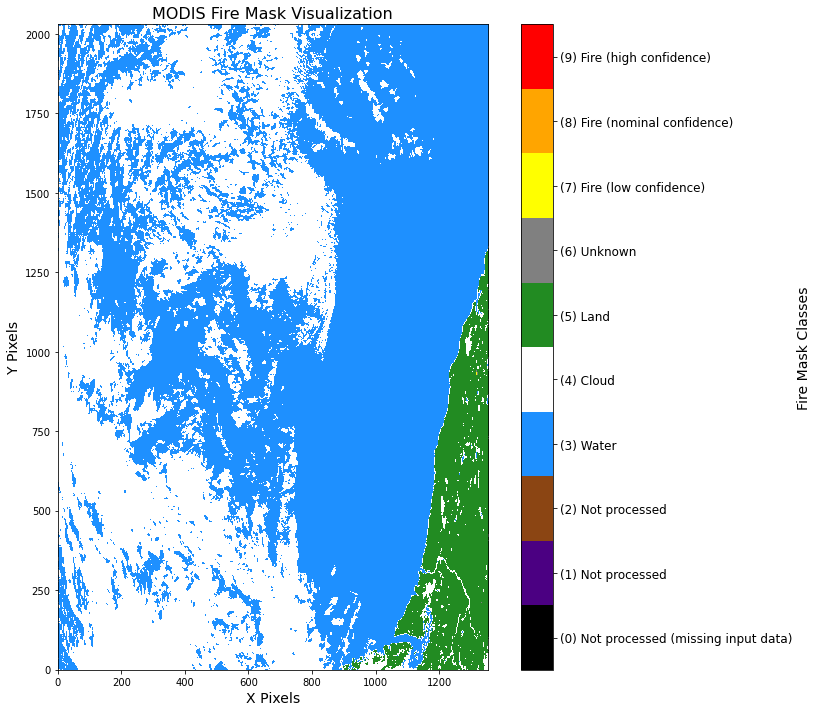

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from pyhdf.SD import SD, SDC

# Define class names with numbers
class_names = {
    0: '(0) Not processed (missing input data)',
    1: '(1) Not processed',
    2: '(2) Not processed',
    3: '(3) Water',
    4: '(4) Cloud',
    5: '(5) Land ',
    6: '(6) Unknown',
    7: '(7) Fire (low confidence)',
    8: '(8) Fire (nominal confidence)',
    9: '(9) Fire (high confidence)'
}

# Define distinct colors for each class
distinct_colors = [
    '#000000',  # Black for not processed (missing input data)
    '#4B0082',  # Indigo for not processed
    '#8B4513',  # SaddleBrown for not processed
    '#1E90FF',  # DodgerBlue for non-fire water pixel
    '#FFFFFF',  # White for cloud
    '#228B22',  # ForestGreen for non-fire land pixel
    '#808080',  # Gray for unknown
    '#FFFF00',  # Yellow for fire (low confidence)
    '#FFA500',  # Orange for fire (nominal confidence)
    '#FF0000'   # Red for fire (high confidence)
]

# File path to the MODIS HDF file
mod14_file = 'MOD14.A2018312.1950.061.2021344091856.hdf'

# Open the HDF file for reading
hdf_file = SD(mod14_file, SDC.READ)

# Find the index of the "fire mask" SDS
fire_mask_sds = hdf_file.select('fire mask')

# Read the entire "fire mask" dataset
fire_mask_data = fire_mask_sds.get()

# Closing the HDF file
hdf_file.end()

# Create a custom colormap
cmap = ListedColormap(distinct_colors)

# Create norm to map values to colors
bounds = np.arange(11) - 0.5
norm = BoundaryNorm(bounds, cmap.N)

# Increase figure size to accommodate larger legend
plt.figure(figsize=(12, 10))

# Plotting the Fire Mask Data with (0, 0) at the bottom-left corner
img = plt.imshow(fire_mask_data, cmap=cmap, norm=norm, origin='lower')

# Add colorbar with larger font size
cbar = plt.colorbar(img, label='Fire Mask Classes', ticks=range(10))
cbar.set_ticklabels([class_names[i] for i in range(10)])
cbar.ax.tick_params(labelsize=12)  # Increase label size
cbar.set_label('Fire Mask Classes', size=14)  # Increase colorbar title size

plt.title('MODIS Fire Mask Visualization', fontsize=16)
plt.xlabel('X Pixels', fontsize=14)
plt.ylabel('Y Pixels', fontsize=14)

# Adjust layout to prevent cutting off colorbar labels
plt.tight_layout()

plt.show()

Find and Print Indices with Fire Mask Values of 8 and 9:

In [52]:
# File path to the MODIS HDF file
mod14_file = 'MOD14.A2018312.1950.061.2021344091856.hdf'

# Open the HDF file for reading
hdf_file = SD(mod14_file, SDC.READ)
# Find the index of the "fire mask" SDS
fire_mask_sds = hdf_file.select('fire mask')

# Read the entire "fire mask" dataset
fire_mask_data = fire_mask_sds.get()

# Closing the HDF file
hdf_file.end()

# Find indices where fire mask equals 8 or 9
fire_8_indices = np.where(fire_mask_data == 8)  # Nominal confidence fire
fire_9_indices = np.where(fire_mask_data == 9)  # High confidence fire

# Combine and print the results
print("Indices of Nominal Confidence Fire (8):")
print(list(zip(fire_8_indices[0], fire_8_indices[1])))

print("\nIndices of High Confidence Fire (9):")
print(list(zip(fire_9_indices[0], fire_9_indices[1])))

# Optional: Count of detections
print(f"\nTotal Nominal Confidence Fire Detections (8): {len(fire_8_indices[0])}")
print(f"Total High Confidence Fire Detections (9): {len(fire_9_indices[0])}")

Indices of Nominal Confidence Fire (8):
[(12, 1064), (118, 1241), (207, 1329), (211, 1330), (212, 1330), (486, 1181), (506, 1269), (510, 1269), (510, 1270), (641, 1183), (790, 1331), (925, 1316), (926, 1316), (927, 1315), (929, 1312), (930, 1315), (930, 1316), (931, 1314), (932, 1313), (933, 1317), (935, 1314), (937, 1315), (940, 1316)]

Indices of High Confidence Fire (9):
[(207, 1330), (785, 1331), (926, 1315), (928, 1313), (928, 1314), (928, 1315), (928, 1316), (929, 1313), (929, 1314), (929, 1316), (931, 1315), (932, 1314), (932, 1315), (932, 1316), (933, 1313), (933, 1314), (933, 1315), (933, 1316), (934, 1313), (934, 1316), (935, 1315), (935, 1316), (936, 1314), (936, 1315), (940, 1314), (940, 1315), (941, 1314), (941, 1315)]

Total Nominal Confidence Fire Detections (8): 23
Total High Confidence Fire Detections (9): 28


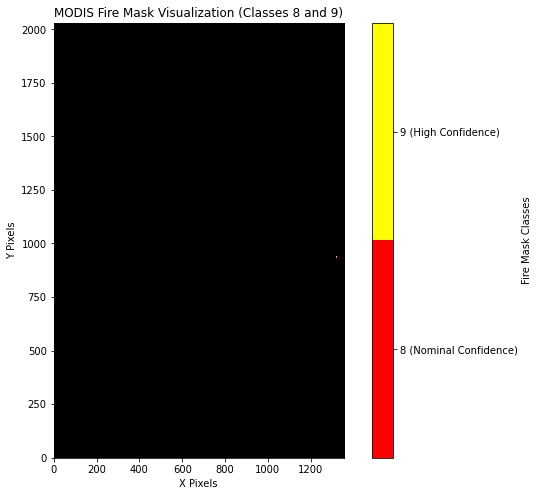

In [6]:
from matplotlib import colors
# File path to the MODIS HDF file
mod14_file = 'MOD14.A2018312.1950.061.2021344091856.hdf'

# Open the HDF file for reading
hdf_file = SD(mod14_file, SDC.READ)



# Find the index of the "fire mask" SDS
fire_mask_sds = hdf_file.select('fire mask')

# Read the entire "fire mask" dataset
fire_mask_data = fire_mask_sds.get()

# Closing the HDF file
hdf_file.end()

# Create separate masks for class 8 and 9
fire_8_mask = fire_mask_data == 8
fire_9_mask = fire_mask_data == 9

# Plotting the Fire Mask Data (Only classes 8 and 9)
plt.figure(figsize=(10, 8))

# Create a base image (all black)
base_image = np.zeros(fire_mask_data.shape + (3,))

# Set red color for class 8 (nominal confidence)
base_image[fire_8_mask] = [1, 0, 0]  # Red

# Set yellow color for class 9 (high confidence)
base_image[fire_9_mask] = [1, 1, 0]  # Yellow

# Plot the image
plt.imshow(base_image, origin='lower', interpolation='none')

# Create a custom colormap for the legend
cmap = colors.ListedColormap(['red', 'yellow'])
bounds = [8, 9, 10]
norm = colors.BoundaryNorm(bounds, cmap.N)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This line is necessary for the colorbar to work correctly
cbar = plt.colorbar(sm, ticks=[8.5, 9.5], label='Fire Mask Classes')
cbar.set_ticklabels(['8 (Nominal Confidence)', '9 (High Confidence)'])

# Adding labels and title
plt.title('MODIS Fire Mask Visualization (Classes 8 and 9)')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')

# Show the plot
plt.show()

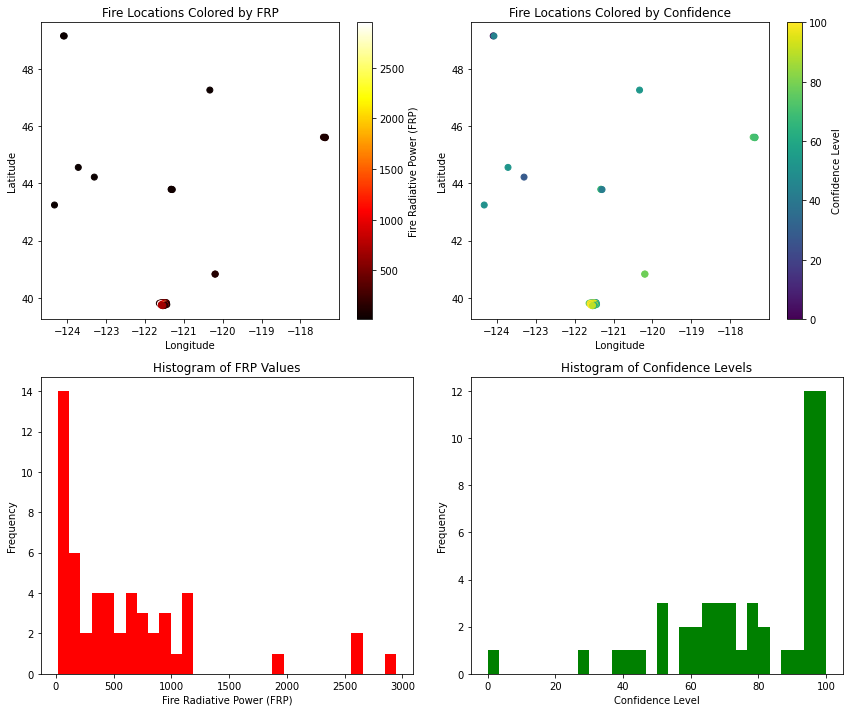

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from pyhdf.SD import SD, SDC

# Open the HDF5 file
file = SD('MOD14.A2018312.1950.061.2021344091856.hdf', SDC.READ)

# Read relevant datasets
latitude = file.select('FP_latitude')[:]
longitude = file.select('FP_longitude')[:]
frp = file.select('FP_power')[:]  # Fire Radiative Power
confidence = file.select('FP_confidence')[:]  # Confidence level

# Plotting the data
plt.figure(figsize=(12, 10))

# Scatter plot of fire locations colored by FRP
plt.subplot(2, 2, 1)
plt.scatter(longitude, latitude, c=frp, cmap='hot', marker='o')
plt.colorbar(label='Fire Radiative Power (FRP)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fire Locations Colored by FRP')

# Scatter plot of fire locations colored by confidence
plt.subplot(2, 2, 2)
plt.scatter(longitude, latitude, c=confidence, cmap='viridis', marker='o')
plt.colorbar(label='Confidence Level')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fire Locations Colored by Confidence')

# Histogram of FRP values
plt.subplot(2, 2, 3)
plt.hist(frp, bins=30, color='red')
plt.xlabel('Fire Radiative Power (FRP)')
plt.ylabel('Frequency')
plt.title('Histogram of FRP Values')

# Histogram of confidence levels
plt.subplot(2, 2, 4)
plt.hist(confidence, bins=30, color='green')
plt.xlabel('Confidence Level')
plt.ylabel('Frequency')
plt.title('Histogram of Confidence Levels')

plt.tight_layout()
plt.show()


In [33]:
# Print unique values for FRP
unique_frp = np.unique(frp)
print("Unique FRP values:")
print(unique_frp)

# Print unique values for Confidence
unique_confidence = np.unique(confidence)
print("Unique Confidence values:")
print(unique_confidence)

Unique FRP values:
[  17.673374   19.503208   22.523102   27.449251   30.935259   35.864765
   41.33715    47.744495   60.081417   71.88807    85.88533    86.5471
   94.02927   101.431244  117.72214   118.31452   132.65257   149.19609
  151.51901   174.34921   225.30533   296.08765   324.10748   325.8158
  351.4247    371.63098   425.24713   442.2041    461.38907   491.3017
  574.7548    576.04395   616.5151    632.84686   653.1302    671.8993
  702.475     752.5529    757.1603    820.87555   866.366     911.9679
  932.34485   946.7112   1025.246    1103.601    1167.0106   1173.3677
 1175.5682   1919.4377   2575.13     2619.3596   2948.6772  ]
Unique Confidence values:
[  0  28  37  42  44  50  52  53  57  61  63  64  65  66  67  68  70  72
  73  76  78  79  80  87  90  94  96  97 100]


# VIIRS data


# VIIRS Fire Data Features

This notebook provides an overview of the key features found in VIIRS fire detection datasets, based on the VIIRS Active Fire User Guide. Each feature is described with its significance and possible values.
https://viirsland.gsfc.nasa.gov/PDF/VIIRS_activefire_User_Guide.pdf#page=8.92

## 1. Longitude and Latitude
- **Description**: Geographic coordinates indicating the position of each detected fire pixel.
- **Format**: Degrees (°)
- **Range**:
  - Longitude: -180° to +180°
  - Latitude: -90° to +90°
  
## 2. Time
- **Description**: The timestamp of when the VIIRS sensor detected the fire pixel.
- **Format**: UTC (Coordinated Universal Time)
- **Use**: It is used to mark the exact time of fire detection, crucial for temporal analysis of fire events.

## 3. Fire Mask (Fire/Land/Water/Burned Area/No Data)
- **Description**: The fire mask assigns categories to each pixel based on whether it detected fire, land, water, or other conditions.
- **Categories**:
  - `0`: Not processed (missing data)
  - `1`: Bowtie deletion (affected by scan geometry)
  - `2`: Sun glint (solar reflection)
  - `3`: Water
  - `4`: Cloud-covered pixels
  - `5`: Non-fire land pixel
  - `6`: Unclassified (insufficient information)
  - `7`: Low confidence fire pixel
  - `8`: Nominal confidence fire pixel
  - `9`: High confidence fire pixel

## 4. FP_power (Fire Radiative Power - FRP)
- **Description**: Fire Radiative Power (FRP) represents the amount of energy released by a fire, expressed in megawatts (MW). It provides a measure of fire intensity and can be used to estimate emissions.
- **Format**: 32-bit floating point (float32)
- **Range**: Typically ranges from >0 MW to around **5000 MW** for large fires.
- **Use**: FRP is a critical metric for evaluating fire energy output and understanding fire behavior, intensity, and emissions.

## 5. FP_confidence (Detection Confidence)
- **Description**: Each fire detection is assigned a confidence level ranging from 0 to 100, representing the likelihood that the pixel represents a true fire.
- **Format**: Unsigned 8-bit integer (uint8)
- **Range**: 
  - **0**: Lowest confidence
  - **100**: Highest confidence
- **Use**: Detection confidence helps users filter out false positives or be more lenient depending on their tolerance for missing true fires. Higher values indicate greater confidence in the detection.

## 6. Source
- **Description**: Indicates the satellite and sensor responsible for detecting the fire pixel.
- **Options**:
  - **Suomi-NPP (VNP)**
  - **NOAA-20**
- **Use**: The source provides information on which satellite was used to collect the data.

---

This guide provides an overview of the main features of VIIRS fire data as outlined in the VIIRS Active Fire User Guide. Each feature is critical for interpreting and analyzing fire detection data, with updates to both **FP_power** and **FP_confidence** to reflect accurate details on fire radiative power and detection confidence.


In [22]:
#read .nc file
import netCDF4 as nc
import numpy as np
import xarray as xr

file_path = 'VJ114.A2018312.2036.002.2022294181925.nc'
dataset = xr.open_dataset(file_path)
dataset 


<xarray.Dataset>
Dimensions:        (phony_dim_0: 12149, phony_dim_1: 8, phony_dim_2: 8042,
                    phony_dim_3: 269, phony_dim_4: 3216, phony_dim_5: 3200,
                    phony_dim_6: 16)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2,
                                phony_dim_3, phony_dim_4, phony_dim_5,
                                phony_dim_6
Data variables: (12/36)
    CMG_day        (phony_dim_0, phony_dim_1) uint16 ...
    CMG_night      (phony_dim_2, phony_dim_1) uint16 ...
    FP_AdjCloud    (phony_dim_3) uint8 ...
    FP_AdjWater    (phony_dim_3) uint8 ...
    FP_CMG_col     (phony_dim_3) int16 ...
    FP_CMG_row     (phony_dim_3) int16 ...
    ...             ...
    fire mask      (phony_dim_4, phony_dim_5) uint8 ...
    qhist07        (phony_dim_6) uint32 ...
    qhist11        (phony_dim_6) uint32 ...
    qhist13        (phony_dim_6) uint32 ...
    qhist15        (phony_dim_6) uint32 ...
    qhist16        (phony_dim_6) uint32 ...
Attributes: (12/81)
    FirePix:                           269
    LandFirePix:                       269
    WaterFirePix:                      0
    MissingPix:                        0
    LandPix:                           5940961
    WaterPix:                          3025247
    ...                                ...
    RangeBeginningDate:                2018-11-08
    PGE_EndTime:                       2018-11-08 20:42:00.000
    project:                           VIIRS Land SIPS Active Fire Project
    SensorShortname:                   VIIRS
    GRingPointSequenceNo:              [1 2 3 4]
    creator_name:                      VIIRS Land SIPS Processing Group

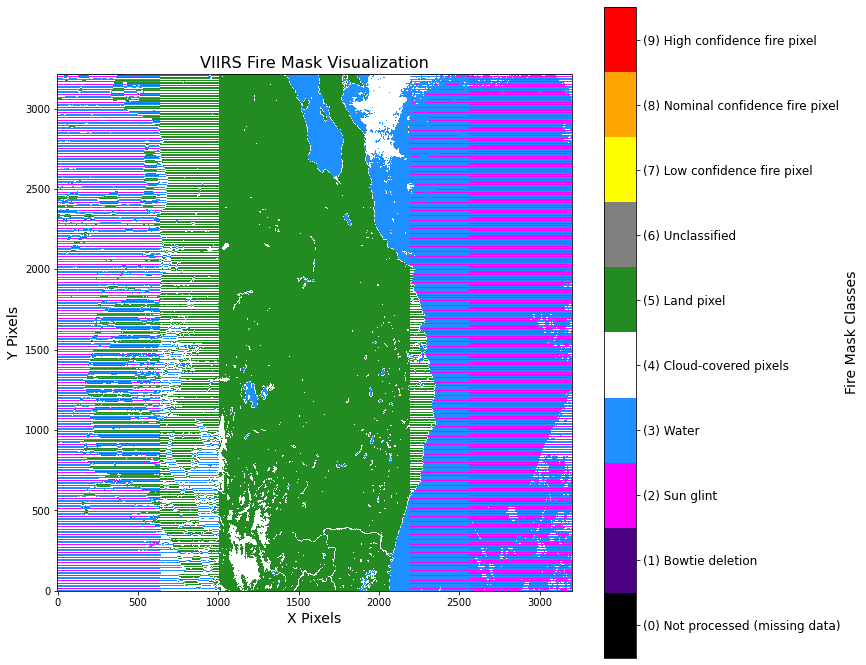

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import xarray as xr

# Define class names with numbers
class_names = {
    0: '(0) Not processed (missing data)',
    1: '(1) Bowtie deletion',
    2: '(2) Sun glint',
    3: '(3) Water',
    4: '(4) Cloud-covered pixels',
    5: '(5) Land pixel',
    6: '(6) Unclassified',
    7: '(7) Low confidence fire pixel',
    8: '(8) Nominal confidence fire pixel',
    9: '(9) High confidence fire pixel'
}

# Define distinct colors for each class
distinct_colors = [
    '#000000',  # Black for not processed (missing data)
    '#4B0082',  # Indigo for bowtie deletion
    '#FF00FF',  # Magenta for sun glint
    '#1E90FF',  # DodgerBlue for water
    '#FFFFFF',  # White for cloud-covered pixels
    '#228B22',  # ForestGreen for non-fire land pixel
    '#808080',  # Gray for unclassified
    '#FFFF00',  # Yellow for low confidence fire pixel
    '#FFA500',  # Orange for nominal confidence fire pixel
    '#FF0000'   # Red for high confidence fire pixel
]

# File path to the NetCDF file
file_path = 'VJ114.A2018312.2036.002.2022294181925.nc'

# Open the NetCDF file
dataset = xr.open_dataset(file_path)

# Extract the fire mask data and flip it vertically
fire_mask_data = np.flipud(dataset['fire mask'].values)

# Create a custom colormap
cmap = ListedColormap(distinct_colors)

# Create norm to map values to colors
bounds = np.arange(11) - 0.5
norm = BoundaryNorm(bounds, cmap.N)

# Increase figure size to accommodate larger legend
plt.figure(figsize=(12, 10))

# Plotting the Fire Mask Data
img = plt.imshow(fire_mask_data, cmap=cmap, norm=norm, origin='lower')

# Add colorbar with larger font size
cbar = plt.colorbar(img, label='Fire Mask Classes', ticks=range(10))
cbar.set_ticklabels([class_names[i] for i in range(10)])
cbar.ax.tick_params(labelsize=12)  # Increase label size
cbar.set_label('Fire Mask Classes', size=14)  # Increase colorbar title size

plt.title('VIIRS Fire Mask Visualization', fontsize=16)
plt.xlabel('X Pixels', fontsize=14)
plt.ylabel('Y Pixels', fontsize=14)

# Adjust layout to prevent cutting off colorbar labels
plt.tight_layout()

plt.show()

# Close the dataset
dataset.close()

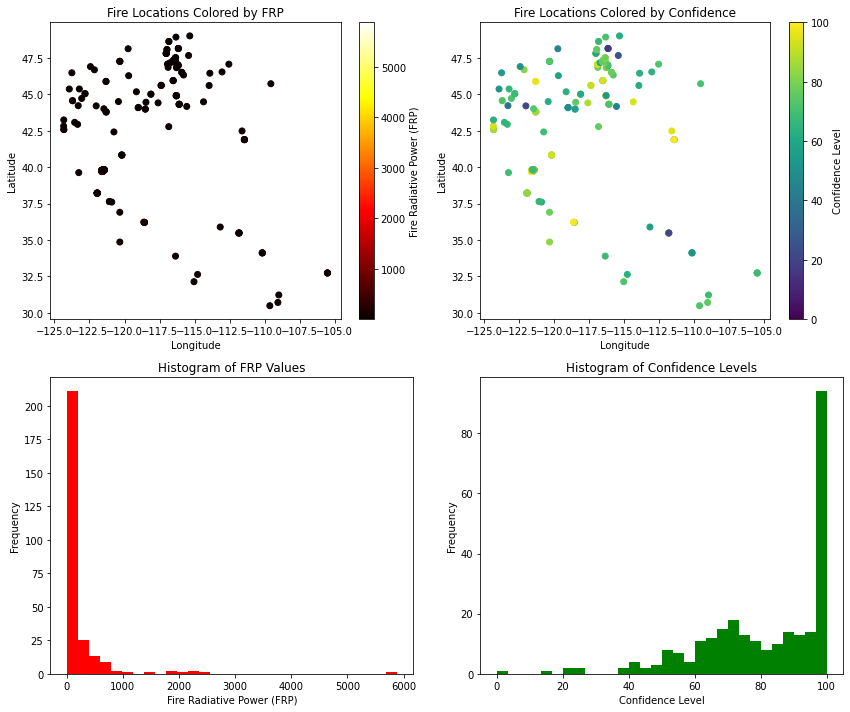

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Load the VIIRS data
file_path = 'VJ114.A2018312.2036.002.2022294181925.nc'
dataset = xr.open_dataset(file_path)

# Extract relevant data
latitude = dataset['FP_latitude'].values
longitude = dataset['FP_longitude'].values
frp = dataset['FP_power'].values  # Fire Radiative Power
confidence = dataset['FP_confidence'].values  # Confidence level

# Plotting the data
plt.figure(figsize=(12, 10))

# Scatter plot of fire locations colored by FRP
plt.subplot(2, 2, 1)
plt.scatter(longitude, latitude, c=frp, cmap='hot', marker='o')
plt.colorbar(label='Fire Radiative Power (FRP)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fire Locations Colored by FRP')

# Scatter plot of fire locations colored by confidence
plt.subplot(2, 2, 2)
plt.scatter(longitude, latitude, c=confidence, cmap='viridis', marker='o')
plt.colorbar(label='Confidence Level')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fire Locations Colored by Confidence')

# Histogram of FRP values
plt.subplot(2, 2, 3)
plt.hist(frp, bins=30, color='red')
plt.xlabel('Fire Radiative Power (FRP)')
plt.ylabel('Frequency')
plt.title('Histogram of FRP Values')

# Histogram of confidence levels
plt.subplot(2, 2, 4)
plt.hist(confidence, bins=30, color='green')
plt.xlabel('Confidence Level')
plt.ylabel('Frequency')
plt.title('Histogram of Confidence Levels')

plt.tight_layout()
plt.show()


# how to get the burnt data

# look into the mldata and satdata

In [14]:
import pickle
def load(file):
    """
    :param file: file name
    :return: the object read
    """
    with open(file, 'rb') as f:
        return pickle.load(f)

file_path = 'ml_data'
data = load(file_path)
data

(array([[-1.20981339e+02,  3.93512192e+01,  6.59722222e-02],
        [-1.20997795e+02,  3.93495026e+01,  6.59722222e-02],
        [-1.20983261e+02,  3.93616486e+01,  6.59722222e-02],
        ...,
        [-1.21519104e+02,  3.98280144e+01,  2.84722222e-02],
        [-1.21531410e+02,  3.98254967e+01,  2.84722222e-02],
        [-1.21543571e+02,  3.98230209e+01,  2.84722222e-02]]),
 array([0., 0., 0., ..., 1., 1., 1.]),
 array([95., 95., 95., ..., 67., 79., 67.]),
 datetime.datetime(2018, 11, 8, 19, 55))

The `mldata` includes three key components:

1. **X (Input Features)**: 
   This is the matrix of input features used for machine learning. The features consist of both ground and fire points from satellite data or other sources. Each point includes:
   - **Longitude**: The longitude coordinate of the data point.
   - **Latitude**: The latitude coordinate of the data point.
   - **Time**: The time of detection for that point (transformed to a numerical representation). 
   
   In the case of fire detections, the coordinates and time of fire points are combined with non-fire (ground) points in a single matrix. The result is a mix of data points that the model will use for prediction.

2. **y (Labels)**:
   This array contains the labels for classification:
   - **0**: Represents ground points (non-fire).
   - **1**: Represents fire points.
   
   The labels are used in a supervised learning scenario, where the model learns to differentiate between fire and non-fire points based on the input features.

3. **c (Confidence Scores)**: 
   The confidence scores are associated with each point and reflect the reliability of the data:
   - For ground points, the confidence score is set to a predefined value, e.g., 95 or 100.
   - For fire points, the confidence score is extracted from the satellite data, indicating how likely a point is to be a true fire detection.

In summary, `mldata` consists of a feature matrix `X`, classification labels `y`, and confidence scores `c`. These are transformed from satellite data (or other data sources) to be used in machine learning models for tasks such as fire detection and classification.

In [23]:
# also read the satdata
satdata = load('satdata')
satdata

{'MYD_A2018312_2130': {'lat': array([[34.41684 , 34.415215, 34.413387, ..., 30.940577, 30.928448,
          30.916212],
         [34.434986, 34.432995, 34.43115 , ..., 30.957766, 30.945688,
          30.933502],
         [34.452915, 34.4508  , 34.448967, ..., 30.974953, 30.962925,
          30.95079 ],
         ...,
         [52.382046, 52.38203 , 52.381977, ..., 47.811012, 47.79322 ,
          47.77526 ],
         [52.400158, 52.40009 , 52.399982, ..., 47.827274, 47.80953 ,
          47.79162 ],
         [52.418274, 52.418144, 52.41798 , ..., 47.84354 , 47.82584 ,
          47.80797 ]], dtype=float32),
  'lon': array([[-111.55181 , -111.5968  , -111.64679 , ..., -135.91766 ,
          -135.96518 , -136.01305 ],
         [-111.54875 , -111.60229 , -111.65133 , ..., -135.92354 ,
          -135.97108 , -136.01898 ],
         [-111.55164 , -111.60675 , -111.6542  , ..., -135.92943 ,
          -135.977   , -136.02493 ],
         ...,
         [-113.2395  , -113.311745, -113.38273 , ..., -1

## adding feature FRP

In [15]:
#modified 
def sat2ml(data, from_utc=None, cg=95., bounds=None):
    """
    Transform satellite data to ML data, including FRP (Fire Radiative Power) as a feature.
    
    :param data: dictionary created using SatelliteCollection
    :param from_utc: utc time to compute all times from
    :param cg: confidence of ground points
    :param bounds: geographic bounds for filtering data
    """
    apply_buffer = False
    tscale = 24.*3600.  # scale from seconds to days

    # Compute scale of starting time
    if from_utc is None:
        scale = 0.
    else:
        scale = dt_to_num(from_utc)

    # Compute limits in the domain depending on fire detections
    if apply_buffer or bounds is None:
        bprop = .3  # boundary extra proportion
        lon_locs = np.concatenate([d['lon_fire'][d['detect_mask']] for d in data.values()])
        lat_locs = np.concatenate([d['lat_fire'][d['detect_mask']] for d in data.values()])
        bb = (lon_locs.min(), lon_locs.max(), lat_locs.min(), lat_locs.max())  # bounds
        buffer = (bprop * (bb[1] - bb[0]), bprop * (bb[3] - bb[2]))  # buffer
        bf = (bb[0] - buffer[0], bb[1] + buffer[0], bb[2] - buffer[1], bb[3] + buffer[1])  # new bounds
    else:
        bf = bounds

    # Initialize lists for fire points (Xf), ground points (Xg), and FRP (frp)
    X = [[], []]
    cf = []  # confidence for fire points
    frp_list = []  # FRP values for fire points

    for gran in data.values():
        tt = (gran['time_num'] - scale) / tscale
        lon_ground = gran['lon'].ravel()[gran['granule_mask']]
        lat_ground = gran['lat'].ravel()[gran['granule_mask']]
        fire = gran['fire'].ravel()[gran['granule_mask']]
        
        # Mask within bounds
        mask = np.logical_and(
            np.logical_and(
                np.logical_and(lon_ground >= bf[0], lon_ground <= bf[1]), 
                lat_ground >= bf[2]), 
            lat_ground <= bf[3]
        )
        fire = fire[mask]
        nofire_mask = fire < 7
        lon_ground = lon_ground[mask][nofire_mask]
        lat_ground = lat_ground[mask][nofire_mask]
        lon_fire = gran['lon_fire'][gran['detect_mask']]
        lat_fire = gran['lat_fire'][gran['detect_mask']]
        conf_fire = gran['conf_fire'][gran['detect_mask']]
        frp_fire = gran['frp_fire'][gran['detect_mask']] # Get FRP data or default to zeros
        
        # Create input features for fire and ground points
        xf = np.c_[(lon_fire, lat_fire, np.repeat(tt, len(lon_fire)))]
        xg = np.c_[(lon_ground, lat_ground, np.repeat(tt, len(lon_ground)))]
        
        # Append FRP as an additional feature to fire points
        xf_with_frp = np.c_[xf, frp_fire]
        
        # For ground points, FRP is set to 0
        xg_with_frp = np.c_[xg, np.zeros(len(xg))]
        
        # Add to the lists
        X[0].append(xf_with_frp)  # Fire points with FRP
        X[1].append(xg_with_frp)  # Ground points with FRP = 0
        cf.append(conf_fire)
    
    # Concatenate the lists into final arrays
    Xf = np.concatenate(X[0])
    Xg = np.concatenate(X[1])
    X = np.concatenate((Xg, Xf))  # Combine ground and fire points
    y = np.concatenate((np.zeros(len(Xg)), np.ones(len(Xf))))  # Labels: 0 for ground, 1 for fire
    c = np.concatenate((cg * np.ones(len(Xg)), np.concatenate(cf)))  # Confidence scores
    
    logging.info('shape X: {}'.format(X.shape))
    logging.info('shape y: {}'.format(y.shape))
    logging.info('shape c: {}'.format(c.shape))
    logging.info('len fire: {}'.format(len(X[y == 1])))
    logging.info('len ground: {}'.format(len(X[y == 0])))
    
    return X, y, c


#### adding source

In [16]:
class SatCollection(object):
    """
    The parent class of all satellite collection that implements common functionality
    """

    def __init__(self, js):
        """
        Initialize satellite collection from a job.

        :param js: Job object. 
        """
        self.manifest = js.manifest
        self.job_path = js.job_path
        self.bounds = js.bounds
        self.sat_sources = [key for key in self.manifest.keys() if self.manifest[key]]

    def process_data(self):
        granules = {}
        for source in self.sat_sources:
            logging.info('SatCollection.process_data - processing sat source {}'.format(source))
            sys.stdout.flush()
            if source == 'Terra':
                for key, granule in self.manifest[source].items():
                    logging.info('SatCollection.process_data - processing granule {}'.format(key))
                    sys.stdout.flush()
                    # Include the source in the granule dictionary
                    granule_data = TerraGranule(granule, self.bounds).read_granule()
                    granule_data['source_label'] = 'MOD'  # Terra is MODIS
                    granules.update({'MOD_' + key: granule_data})
            elif source == 'Aqua':
                for key, granule in self.manifest[source].items():
                    logging.info('SatCollection.process_data - processing granule {}'.format(key))
                    sys.stdout.flush()
                    # Include the source in the granule dictionary
                    granule_data = AquaGranule(granule, self.bounds).read_granule()
                    granule_data['source_label'] = 'MYD'  # Aqua is MYD
                    granules.update({'MYD_' + key: granule_data})
            elif source == 'SNPP':
                for key, granule in self.manifest[source].items():
                    logging.info('SatCollection.process_data - processing granule {}'.format(key))
                    sys.stdout.flush()
                    # Include the source in the granule dictionary
                    granule_data = SNPPGranule(granule, self.bounds).read_granule()
                    granule_data['source_label'] = 'VNP'  # S-NPP VIIRS
                    granules.update({'VNP_' + key: granule_data})
            elif source == 'NOAA20':
                for key, granule in self.manifest[source].items():
                    logging.info('SatCollection.process_data - processing granule {}'.format(key))
                    sys.stdout.flush()
                    # Include the source in the granule dictionary
                    granule_data = NOAA20Granule(granule, self.bounds).read_granule()
                    granule_data['source_label'] = 'VJ1'  # NOAA-20 VIIRS
                    granules.update({'VJ1_' + key: granule_data})
            else:
                logging.warning('SatCollection.process_data: sat source {} not existent'.format(source))
        logging.debug('SatCollection.process_data: granules processed {}'.format(list(granules.keys())))
        sat_file = osp.join(self.job_path, 'satdata')
        sl.save(granules, sat_file)
        logging.info('SatCollection.process_data: satellite data processed as {}'.format(sat_file))
        return granules


In [ ]:
def sat2ml(data, from_utc=None, cg=95., bounds=None):
    """
    Transform satellite data to ML data with added FRP (Fire Radiative Power) and source.

    :param data: dictionary created using SatelliteCollection
    :param from_utc: utc time to compute all times from
    :param cg: confidence of ground points
    :param bounds: bounding box for limiting data
    """
    apply_buffer = False
    tscale = 24. * 3600.  # scale from seconds to days

    # Define satellite source mappings (assign numerical values to each source)
    source_mapping = { # just Modis , Viirs , Goes
        'MOD': 0,   # Terra
        'MYD': 1,   # Aqua
        'VNP': 2,   # S-NPP
        'VJ1': 3    # NOAA-20
    }

    # Compute scale of starting time
    if from_utc is None:
        scale = 0.
    else:
        scale = dt_to_num(from_utc)

    # Compute limits in the domain depending on fire detections
    if apply_buffer or bounds is None:
        bprop = .3  # boundary extra proportion
        lon_locs = np.concatenate([d['lon_fire'][d['detect_mask']] for d in data.values()])
        lat_locs = np.concatenate([d['lat_fire'][d['detect_mask']] for d in data.values()])    
        bb = (lon_locs.min(), lon_locs.max(), lat_locs.min(), lat_locs.max())  # bounds
        buffer = (bprop * (bb[1] - bb[0]), bprop * (bb[3] - bb[2]))  # buffer
        bf = (bb[0] - buffer[0], bb[1] + buffer[0], bb[2] - buffer[1], bb[3] + buffer[1])  # new bounds
    else:
        bf = bounds

    # For each granule
    X = [[], []]
    cf = []
    frp_vals = []
    sources = []  # Store source information

    for gran in data.values():
        tt = (gran['time_num'] - scale) / tscale
        lon_ground = gran['lon'].ravel()[gran['granule_mask']]
        lat_ground = gran['lat'].ravel()[gran['granule_mask']]
        fire = gran['fire'].ravel()[gran['granule_mask']]
        mask = np.logical_and(
            np.logical_and(
                np.logical_and(
                    lon_ground >= bf[0], 
                    lon_ground <= bf[1]), 
                lat_ground >= bf[2]), 
            lat_ground <= bf[3]
        )
        fire = fire[mask]
        nofire_mask = fire < 7
        lon_ground = lon_ground[mask][nofire_mask]
        lat_ground = lat_ground[mask][nofire_mask]

        # Get fire points, including FRP
        lon_fire = gran['lon_fire'][gran['detect_mask']]
        lat_fire = gran['lat_fire'][gran['detect_mask']]
        conf_fire = gran['conf_fire'][gran['detect_mask']]
        frp_fire = gran['frp_fire'][gran['detect_mask']]  # Add FRP for fire points

        # Determine the source from the granule key (e.g., 'MOD', 'MYD', etc.)
        source_label = gran['source_label']  # Assuming the source is stored in gran['source_label']
        source_encoded = source_mapping.get(source_label[:3], -1)  # Get the source code

        # Combine fire and ground features
        xf = np.c_[(lon_fire, lat_fire, np.repeat(tt, len(lon_fire)), frp_fire, np.repeat(source_encoded, len(lon_fire)))]  # Add source
        xg = np.c_[(lon_ground, lat_ground, np.repeat(tt, len(lon_ground)), np.zeros(len(lon_ground)), np.repeat(source_encoded, len(lon_ground)))]  # No FRP for ground points, but add source

        X[0].append(xf)
        X[1].append(xg)
        cf.append(conf_fire)
        frp_vals.append(frp_fire)  # Store FRP values

    Xf = np.concatenate(X[0])
    Xg = np.concatenate(X[1])
    X = np.concatenate((Xg, Xf))
    y = np.concatenate((np.zeros(len(Xg)), np.ones(len(Xf))))
    c = np.concatenate((cg * np.ones(len(Xg)), np.concatenate(cf)))

    logging.info('shape X: {}'.format(X.shape))
    logging.info('shape y: {}'.format(y.shape))
    logging.info('shape c: {}'.format(c.shape))
    logging.info('shape FRP: {}'.format(len(np.concatenate(frp_vals))))
    logging.info('len fire: {}'.format(len(X[y == 1])))
    logging.info('len ground: {}'.format(len(X[y == 0])))

    return X, y, c  # You now have X with FRP and source, y, and c


### add label  fire/land/water/no data

In [ ]:
def sat2ml(data, from_utc=None, cg=95., bounds=None):
    """
    Transform satellite data to ML data with multi-class labels (fire, land, water, no data).

    :param data: dictionary created using SatelliteCollection
    :param from_utc: utc time to compute all times from
    :param cg: confidence of ground points
    :param bounds: bounding box for limiting data
    """
    apply_buffer = False
    tscale = 24. * 3600.  # scale from seconds to days

    # Compute scale of starting time
    if from_utc is None:
        scale = 0.
    else:
        scale = dt_to_num(from_utc)

    # Compute limits in domain depending on fire detections
    if apply_buffer or bounds is None:
        bprop = .3  # boundary extra proportion
        lon_locs = np.concatenate([d['lon_fire'][d['detect_mask']] for d in data.values()])
        lat_locs = np.concatenate([d['lat_fire'][d['detect_mask']] for d in data.values()])
        bb = (lon_locs.min(), lon_locs.max(), lat_locs.min(), lat_locs.max())  # bounds
        buffer = (bprop * (bb[1] - bb[0]), bprop * (bb[3] - bb[2]))  # buffer
        bf = (bb[0] - buffer[0], bb[1] + buffer[0], bb[2] - buffer[1], bb[3] + buffer[1])  # new bounds
    else:
        bf = bounds

    # Initialize lists to hold data
    X = [[], []]
    cf = []
    multi_class_labels = []  # This will hold the multi-class labels for y

    for gran in data.values():
        tt = (gran['time_num'] - scale) / tscale
        lon_ground = gran['lon'].ravel()[gran['granule_mask']]
        lat_ground = gran['lat'].ravel()[gran['granule_mask']]
        fire = gran['fire'].ravel()[gran['granule_mask']]  # This is where the mask values are stored
        
        # Mask to only keep points within the bounds
        mask = np.logical_and(
            np.logical_and(
                np.logical_and(
                    lon_ground >= bf[0], 
                    lon_ground <= bf[1]), 
                lat_ground >= bf[2]), 
            lat_ground <= bf[3]
        )

        fire = fire[mask]  # Apply the bounds mask to the fire mask

        # Assign labels based on fire mask values
        # 7, 8, 9 -> fire (label 1)
        # 3 -> water (label 3)
        # 5 -> land (label 2)
        # Other values -> no data (label 4)
        
        labels = np.full_like(fire, 4)  # Initialize as 'no data' (label 4)
        labels[np.isin(fire, [7, 8, 9])] = 1  # Fire (label 1)
        labels[fire == 3] = 3  # Water (label 3)
        labels[fire == 5] = 2  # Land (label 2)

        # Separate fire and ground features
        lon_ground = lon_ground[mask]
        lat_ground = lat_ground[mask]

        # Fire points (detection data)
        lon_fire = gran['lon_fire'][gran['detect_mask']]
        lat_fire = gran['lat_fire'][gran['detect_mask']]
        conf_fire = gran['conf_fire'][gran['detect_mask']]
        
        # Add FRP as a feature for fire points
        frp_fire = gran['frp_fire'][gran['detect_mask']]  # Fire Radiative Power
        
        # Combine fire and ground features, add FRP as a feature
        xf = np.c_[(lon_fire, lat_fire, np.repeat(tt, len(lon_fire)), frp_fire)]  # Fire points with FRP
        xg = np.c_[(lon_ground, lat_ground, np.repeat(tt, len(lon_ground)), np.zeros(len(lon_ground)))]  # Ground points with no FRP
        
        # Append to feature list
        X[0].append(xf)
        X[1].append(xg)
        
        # Confidence
        cf.append(conf_fire)
        
        # Append labels to multi-class labels list
        multi_class_labels.append(labels)

    # Concatenate features and labels
    Xf = np.concatenate(X[0])
    Xg = np.concatenate(X[1])
    X = np.concatenate((Xg, Xf))
    
    # Multi-class labels (fire/land/water/no data)
    y = np.concatenate(multi_class_labels)
    
    # Confidence array
    c = np.concatenate((cg * np.ones(len(Xg)), np.concatenate(cf)))
    
    logging.info('shape X: {}'.format(X.shape))
    logging.info('shape y: {}'.format(y.shape))
    logging.info('shape c: {}'.format(c.shape))
    
    return X, y, c
